In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import lsst.all_sky_phot.wcs as asp
from read_stars import read_manual_stars
from scipy.optimize import minimize
from astropy.io import fits

In [2]:
# Read in stars measured off several exposures
stars = read_manual_stars('starcoords.dat')
stars

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


array([ ('Achernar', 3441.0, 2918.0, 57415.03236111111, 49.947050461141515, 215.1280625253878),
       ('Achernar', 3576.0, 3018.0, 57415.06576388889, 43.715460044327585, 217.98734214492922),
       ('Betelgeuse', 2123.0, 971.0, 57415.01190972222, 43.319872170968644, 40.984431336638984),
       ('Betelgeuse', 2330.0, 956.0, 57415.03236111111, 47.122656796538564, 32.091831385823845),
       ('Betelgeuse', 2677.0, 949.0, 57415.06576388889, 51.30177229534061, 14.886238412655885),
       ('Canopus', 2221.0, 2671.0, 57415.01190972222, 55.59320568854928, 141.12216403321605),
       ('Canopus', 2338.0, 2640.0, 57415.03236111111, 59.417680615391944, 145.4395870063344),
       ('Canopus', 2539.0, 2609.0, 57415.06576388889, 64.53278238450694, 156.57094949814072),
       ('Procyon', 1418.0, 1164.0, 57415.01190972222, 26.77820616264145, 65.70791797900411),
       ('Procyon', 1610.0, 1115.0, 57415.03236111111, 32.46281914154827, 60.339168551036586),
       ('Procyon', 1935.0, 1053.0, 57415.06576388

Try out a simple Zenith Equal Area Projection

In [3]:
fun = asp.wcs_zea(stars['x'], stars['y'], stars['alt'], stars['az'], crpix1=2.87356521e+03, crpix2=1.98559533e+03)
#x0 = [np.median(stars['x']), np.median(stars['y']), 0.1, 0.1, 1., 0., 0., 1.]
x0 = np.array([2.87356521e+03,   1.98559533e+03,  1., 1., .036,
        0.0027,  0.00295,   -0.0359])

In [4]:
fit_result = minimize(fun, x0)

In [5]:
fit_result

      fun: 1184.2829407692182
 hess_inv: array([[  5.38499517e-02,   1.59420006e-04,  -5.08250406e-04,
          1.19987277e-03,   1.58284629e-05,   1.59069267e-06,
         -3.78184757e-06,   4.41998571e-05],
       [  1.59418695e-04,   5.63506320e-02,  -2.10339875e-04,
          4.31825476e-04,   7.17349279e-06,   5.70302392e-07,
          7.19581856e-07,   1.55885367e-05],
       [ -5.08250301e-04,  -2.10339755e-04,   1.87460564e-04,
         -2.79036848e-04,  -6.41010030e-06,  -4.99700848e-07,
          8.36693683e-07,  -1.02986631e-05],
       [  1.19987287e-03,   4.31825533e-04,  -2.79036845e-04,
          5.70324814e-04,   9.49724490e-06,   7.45630324e-07,
         -1.70469622e-06,   2.10036406e-05],
       [  1.58284594e-05,   7.17348873e-06,  -6.41010030e-06,
          9.49724499e-06,   2.19312020e-07,   1.70123107e-08,
         -2.84717496e-08,   3.50531727e-07],
       [  1.59069229e-06,   5.70301867e-07,  -4.99700842e-07,
          7.45630337e-07,   1.70123105e-08,   1.4370

In [6]:
wcs = fun.return_wcs(fit_result.x)
wcs.to_header(relax=True)

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      2874.5646557991 / Pixel coordinate of reference point            
CRPIX2  =      1986.5953072992 / Pixel coordinate of reference point            
PC1_1   =    0.035223145790635 / Coordinate transformation matrix element       
PC1_2   =   0.0027089866616735 / Coordinate transformation matrix element       
PC2_1   =   0.0029855203829786 / Coordinate transformation matrix element       
PC2_2   =   -0.036377547997604 / Coordinate transformation matrix element       
CDELT1  =      1.0174149741576 / [deg] Coordinate increment at reference point  
CDELT2  =      0.9884943119796 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---ZEA-SIP'       / TAN (gnomonic) projection + SIP distortions    
CTYPE2  = 'DEC--ZEA-SIP'    

In [7]:
header = wcs.to_header(relax=True)
hdu = fits.PrimaryHDU(header=header)
hdu.writeto('wcs_zea_only.fits')

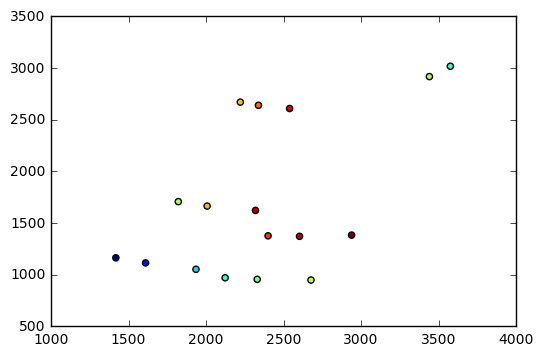

In [8]:
plt.scatter(stars['x'], stars['y'], c=stars['alt'])

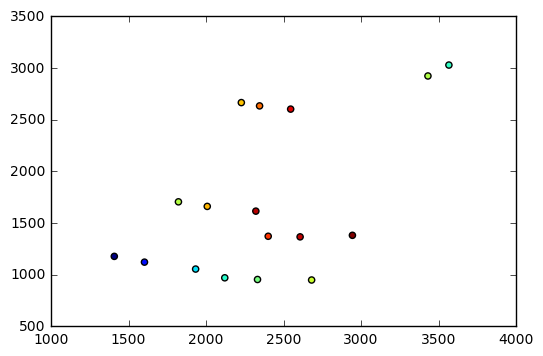

In [9]:
fit_x, fit_y = wcs.all_world2pix(stars['az'], stars['alt'], 0)
plt.scatter(fit_x, fit_y, c=stars['alt'])

In [10]:
fit_result.x

array([  2.87456466e+03,   1.98659531e+03,   1.01741497e+00,
         9.88494312e-01,   3.52231458e-02,   2.70898666e-03,
         2.98552038e-03,  -3.63775480e-02])

In [11]:
x0

array([  2.87356521e+03,   1.98559533e+03,   1.00000000e+00,
         1.00000000e+00,   3.60000000e-02,   2.70000000e-03,
         2.95000000e-03,  -3.59000000e-02])

In [12]:
fun = asp.wcs_azp(stars['x'], stars['y'], stars['alt'], stars['az'])
print fun.b_ind

[19 20 21 22 23 24 25 26 27]


In [13]:
# Fit a projection + affine transform (no distortions)
fun = asp.wcs_azp(stars['x'], stars['y'], stars['alt'], stars['az'], crpix1=2.87356521e+03, crpix2=1.98559533e+03)
x0 = np.array([2.87356521e+03,   1.98559533e+03,  1., 1., .036,
        0.0027,  0.00295,   -0.0359, 50., 20.])
#x0[0:2] += 1.
#x0[2:6] = [1., 0., 0., 1.]
# x0[0:10] = [ 2.87356521e+03, 1.98559533e+03, 20,20, -2.77295650e+01, -2.12539223e+00,  -2.27577547e+00,   2.76348359e+01, 2.6, -10.]
fit_result = minimize(fun, x0)
fit_result.x

array([  2.87267269e+03,   1.98195086e+03,   1.10398926e+00,
         1.03597692e+00,   3.26417208e-02,   2.46626045e-03,
         2.75244770e-03,  -3.48526205e-02,   2.59344103e+00,
        -1.99371221e+00])

-0.000208910671143 3.87773877403
-0.000172531714584 7.09830737294


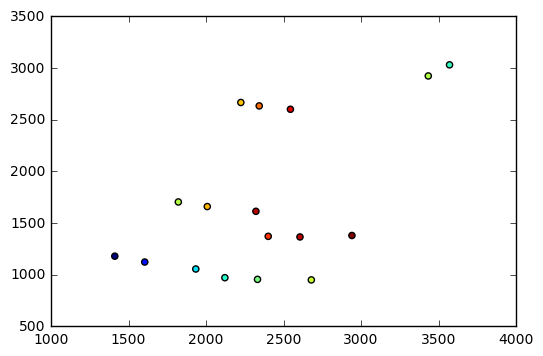

In [14]:
wcs = fun.return_wcs(fit_result.x)
fit_x, fit_y = wcs.all_world2pix(stars['az'], stars['alt'], 0)
plt.scatter(fit_x, fit_y, c=stars['alt'])
print np.mean(fit_x-stars['x']), np.std(fit_x-stars['x'])
print np.mean(fit_y-stars['y']), np.std(fit_y-stars['y'])

In [15]:
header = wcs.to_header(relax=True)
hdu = fits.PrimaryHDU(header=header)
hdu.writeto('wcs_asp_only.fits')

In [16]:
x0 = np.array([2.87356521e+03,   1.98559533e+03,  1., 1., .036,
        0.0027,  0.00295,   -0.0359, 50., 20.])
x0 = np.concatenate((fit_result.x, np.zeros(18)*1e-3))

In [17]:
x0

array([  2.87267269e+03,   1.98195086e+03,   1.10398926e+00,
         1.03597692e+00,   3.26417208e-02,   2.46626045e-03,
         2.75244770e-03,  -3.48526205e-02,   2.59344103e+00,
        -1.99371221e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

In [18]:
# When all else fails, just randomly try out different solvers until one manages to interate!
fit_result = minimize(fun, x0, method='Powell')
fit_result.x

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


array([  2.86838858e+03,   1.98672240e+03,   1.10089534e+00,
         1.03914954e+00,   3.26405063e-02,   2.48646309e-03,
         2.49449754e-03,  -3.47360559e-02,   2.60509246e+00,
        -1.45501017e+00,  -2.27255460e+00,  -7.91054959e-04,
         1.11756988e-07,  -1.22568846e-03,  -6.22409138e-06,
         2.38250703e+02,  -4.69851376e-06,   2.38250703e+02,
         2.38250703e+02,  -4.39724418e+00,  -2.13191577e-03,
         8.07734971e-06,   3.91346373e-03,  -3.59558798e-06,
         2.38250703e+02,   1.72817818e-05,   2.38250703e+02,
         2.38250703e+02])

In [19]:
fit_result.fun

32.539008975074388

0.0109223851568 1.06377308888
0.0974247245549 0.884559342298


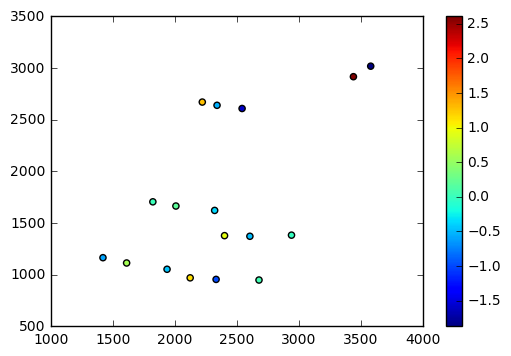

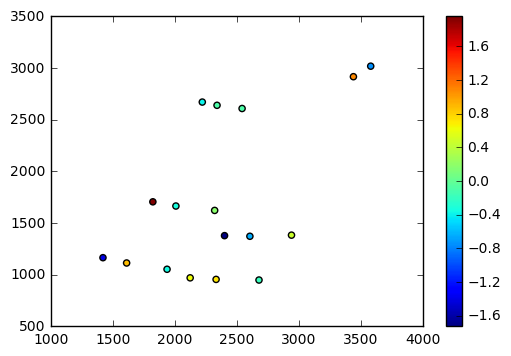

In [20]:
wcs = fun.return_wcs(fit_result.x)
fit_x, fit_y = wcs.all_world2pix(stars['az'], stars['alt'], 0)
plt.scatter(fit_x, fit_y, c=stars['x']-fit_x)
plt.colorbar()
plt.figure()
plt.scatter(fit_x, fit_y, c=stars['y']-fit_y)
plt.colorbar()
print np.median(fit_x-stars['x']), np.std(fit_x-stars['x'])
print np.median(fit_y-stars['y']), np.std(fit_y-stars['y'])

In [21]:
wcs.to_header(relax=True)

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      2868.3885797727 / Pixel coordinate of reference point            
CRPIX2  =      1986.7223951542 / Pixel coordinate of reference point            
PC1_1   =    0.032640506323318 / Coordinate transformation matrix element       
PC1_2   =   0.0024864630873915 / Coordinate transformation matrix element       
PC2_1   =   0.0024944975391288 / Coordinate transformation matrix element       
PC2_2   =   -0.034736055940277 / Coordinate transformation matrix element       
CDELT1  =      1.1008953406995 / [deg] Coordinate increment at reference point  
CDELT2  =      1.0391495419234 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---AZP-SIP'       / TAN (gnomonic) projection + SIP distortions    
CTYPE2  = 'DEC--AZP-SIP'    

In [22]:
# WORKED! Now to write it out
header = wcs.to_header(relax=True)
hdu = fits.PrimaryHDU(header=header)
hdu.writeto('wcs_asp_SIP.fits')

In [23]:
x, y = np.meshgrid(np.arange(1000,4000, 1), np.arange(500, 3500, 1))

In [24]:
x = x.ravel()
y = y.ravel()
az, alt = wcs.all_pix2world(x,y, 0)

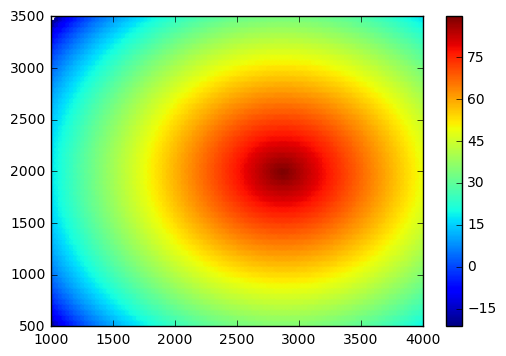

In [25]:
plt.hexbin(x,y, alt)
plt.colorbar()

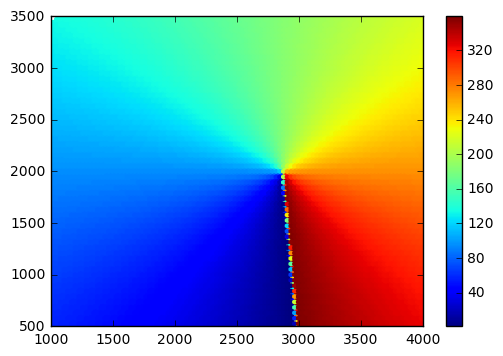

In [26]:
plt.hexbin(x,y, az)
plt.colorbar()